<a href="https://colab.research.google.com/github/GeneralHassaan/Projects/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# HASSAAN ASIF
# REGRESSION METRICS 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
filename = '/content/Boston_Housing_from_Sklearn.csv'

In [4]:
df = pd.read_csv(filename)
df.head()


,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


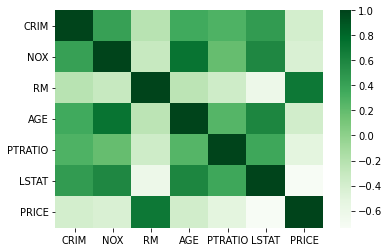

In [5]:
#1
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens')

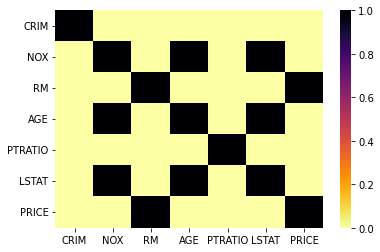

In [6]:
sns.heatmap(corr >= 0.5, cmap = 'inferno_r')

In [7]:
y = df['PRICE']
X = df.loc[:, df.columns]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [9]:
scaler = StandardScaler()
reg = LinearRegression()
reg_pipe = make_pipeline(scaler, reg)
reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [10]:
train_pred = reg_pipe.predict(X_train)
test_pred = reg_pipe.predict(X_test)

In [11]:
# calculating R2

train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

print(f'Model training r2: {train_r2}')
print(f'Model testing r2: {test_r2}')

Model training r2: 1.0
Model testing r2: 1.0


In [12]:
# MAE
train_MAE = np.mean(np.abs(train_pred - y_train))
test_MAE = np.mean(np.abs(test_pred - y_test))

print(f'Model Training MAE :{train_MAE}')
print(f'Model Testing MAE :{test_MAE}')


Model Training MAE :3.3699223417645912e-15
Model Testing MAE :3.217024197339036e-15


In [13]:
# MSE
train_MSE = mean_squared_error(y_train, train_pred)
test_MSE = mean_squared_error(y_test, test_pred)

print(f'Model Training MSE: {train_MSE}')
print(f'Model Testing MSE: {test_MSE}')

Model Training MSE: 2.2437785114201865e-29
Model Testing MSE: 1.818728134241829e-29


In [14]:
train_RMSE = np.sqrt(np.mean(np.abs(train_pred - y_train)**2))
test_RMSE = np.sqrt(np.mean(np.abs(test_pred - y_test)**2))

print(f'Model Training RMSE: {train_RMSE}')
print(f'Model Testing RMSE: {test_RMSE}')


Model Training RMSE: 4.736853925782583e-15
Model Testing RMSE: 4.264654891362054e-15
